In this file we import our dataset, convert text data into numerical data, evaluate performance of various linear as well as non-linear classification models

 Variables and their meaning:\
  **model -> stores instances of classification model**\
  **X -> 0-1 matrix corresponding to data in dataset. Generated using CountVectoriser**\
  **Y -> True-Fasle matrix corresponding to label for each data point**

<h1>Connect to Google Drive</h1>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

<h1>Import Libraries<h1>

In [2]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
# Downloading the Stopwords
nltk.download('stopwords')

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Accuracy Score, F1 Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tdgro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h1>Defining Functions</h1>

In [3]:
def evaluate_model(model=None, metric:str='both', is_split:bool=True, train_set:tuple=None, test_set:tuple=None):
    '''
    This function performs prediction and print evaluation of predicition

    model: instance of a fitted model

    metric: string corresponding to metric to be calculated.
            'both' means to compute accuracy and f1 score
            'accuracy' means to compute accuracy only
            'f1' means to compute f1 only

    is_split: bool value to tell if data is split into train and test set
                True means that data is split
                False means that data is not splitted

    train_set: tuple value which contains both train dataset at 0th position and corresponding labels at 1st position
                in the form np.array
                If is_split is False, then train_set is assumed to contain dataset and corresponding label

    test_set: tuple value which contains both train dataset at 0th position and corresponding labels at 1st position
                in the form np.array
    '''

    if model is None:
        raise Exception("No Model Provided")

    if is_split and (train_set is not None and test_set is not None):
        prediction_train = model.predict(train_set[0])
        prediction_test = model.predict(test_set[0])

        if (metric == 'both'):
            accuracy_train = accuracy_score(train_set[1], prediction_train)
            f1_train = f1_score(train_set[1], prediction_train)

            accuracy_test = accuracy_score(test_set[1], prediction_test)
            f1_test = f1_score(test_set[1], prediction_test)

            print(f"Accuracy on train data is: {accuracy_train*100:.2f}")
            print(f"Accuracy on test data is: {accuracy_test*100:.2f}")

            print(f"F1 score on train data is: {f1_train:.2f}")
            print(f"F1 score on test data is: {f1_test:.2f}")

        elif (metric == 'accuracy'):
            accuracy_train = accuracy_score(train_set[1], prediction_train)
            accuracy_test = accuracy_score(test_set[1], prediction_test)

            print(f"Accuracy on train data is: {accuracy_train*100:.2f}")
            print(f"Accuracy on test data is: {accuracy_test*100:.2f}")

        elif (metric == 'f1'):
            f1_train = f1_score(train_set[1], prediction_train)
            f1_test = f1_score(test_set[1], prediction_test)

            print(f"F1 score on train data is: {f1_train:.2f}")
            print(f"F1 score on test data is: {f1_test:.2f}")
    else:
        prediction = model.predict(train_set[0])

        if (metric == 'both'):
            accuracy = accuracy_score(train_set[1], prediction)
            f1 = f1_score(train_set[1], prediction)

            print(f"Accuracy on train data is: {accuracy*100:.2f}")
            print(f"F1 score on train data is: {f1:.2f}")

        elif (metric == 'accuracy'):
            accuracy = accuracy_score(train_set[1], prediction)
            print(f"Accuracy on train data is: {accuracy*100:.2f}")

        elif (metric == 'f1'):
            f1 = f1_score(train_set[1], prediction)
            print(f"F1 score on train data is: {f1:.2f}")

In [4]:
def generate_confusion_matrix(data:np.array=None, labels:np.array=None, model=None):

    '''
    To print and display confusion matrix

    data: matrix corresponding to dataset

    labels: matrix corresponding to labels of each datapoint

    model: instance of a fitted model
    '''

    if model is None:
        raise Exception("No Model provided")

    if data is None or labels is None:
        raise Exception("Either data or label or both are not provided")

    prediction = model.predict(data)
    tn, fp, fn, tp = confusion_matrix(list(labels), list(prediction), labels=[False, True]).ravel()

    print('True Positive', tp)
    print('True Negative', tn)
    print('False Positive', fp)
    print('False Negative', fn)

    ConfusionMatrixDisplay.from_predictions(labels, prediction)
    plt.show()

<h1>Import Data and Data Pre-processing<h1>

<h2>Import Data</h2>

In [6]:
# Read the dataset in file "spam.csv". Downloaded from Kaggle -> https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
# Link to original dataset -> https://archive.ics.uci.edu/dataset/228/sms+spam+collection
# Credit to authors of original dataset: Almeida, T. & Hidalgo, J. (2011). SMS Spam Collection [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5CC84.
# spam = pd.read_csv("/content/drive/My Drive/Colab Notebooks/spam message dataset/spam.csv", encoding='ISO-8859-1')
spam = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [7]:
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
spam.groupby('label').size()

label
ham     4825
spam     747
dtype: int64

<h2>Convert Text Messages into Numerical Data</h2>

<h3>Porter Stemming and Data Cleanup</h3>

Porter Stemming removes suffixes from words in English. Example: cats -> cat; agreed -> agree; failing -> fail

In [10]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
for idx in range(6):
    print(f"Before Porter Stemming: {spam['message'][idx]}")
    print(f"After Porter Stemming: {corpus[idx]}")
    print("\n")

Before Porter Stemming: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
After Porter Stemming: go jurong point crazi avail bugi n great world la e buffet cine got amor wat


Before Porter Stemming: Ok lar... Joking wif u oni...
After Porter Stemming: ok lar joke wif u oni


Before Porter Stemming: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
After Porter Stemming: free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli


Before Porter Stemming: U dun say so early hor... U c already then say...
After Porter Stemming: u dun say earli hor u c alreadi say


Before Porter Stemming: Nah I don't think he goes to usf, he lives around here though
After Porter Stemming: nah think goe usf live around though


Before Porter Stemming: FreeMsg Hey there darling it's been 3 week's now 

<h3>Converting cleaned data into numerical form using Count Vectorizer</h3>

Creates a matrix where row corresponds to messages and columns corresponds to unique words in the collection of messages. If element at ith row and jth columns is 0, then it means that ith message does not have word corresponding to jth column and if it is 1, then it means that ith message has a word corresponding to jth column. Let X correspond to this matrix

Also, create a matrix of size number_of_message x 1 corresponding to label associated with each message and let Y is that matrix. Y is a true-false matrix where True -> Spam and False -> Ham

In [12]:
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

In [13]:
print(f"Number of Data points, n = {len(X)}")
print(f"Number of Features, p = {len(X[1])}")

Number of Data points, n = 5572
Number of Features, p = 6221


<h1>Logistic Regression</h1>

<h2>Selecting penalty and solver</h2>

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [23]:
model = LogisticRegression(penalty='l2', solver='liblinear', n_jobs=-1, tol=0.0001, C=1.0, fit_intercept=True, class_weight="balanced", max_iter=6221, warm_start=False)
model.fit(X_train, Y_train)

D:\Anaconda\envs\spamDetection\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=6221, n_jobs=-1,
                   solver='liblinear')

In [24]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 99.82
Accuracy on test data is: 98.57
F1 score on train data is: 0.99
F1 score on test data is: 0.94


True Positive 596
True Negative 3853
False Positive 7
False Negative 1


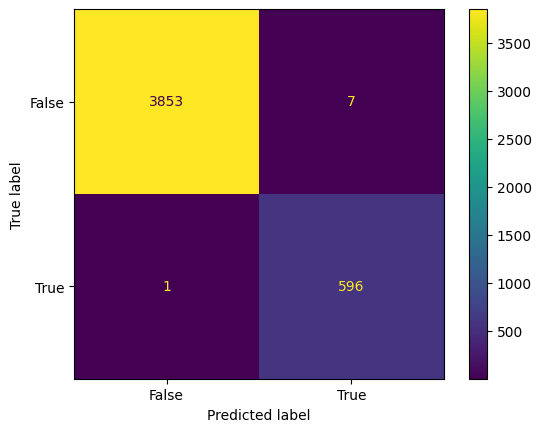

In [25]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 136
True Negative 963
False Positive 2
False Negative 14


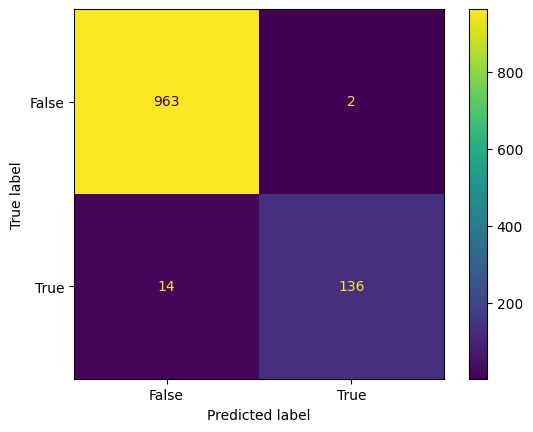

In [26]:
generate_confusion_matrix(X_test, Y_test, model)

<h2>Adjusting Stopping Criteria value</h2>

In [27]:
model = LogisticRegression(penalty='l2', solver='liblinear', n_jobs=-1, tol=1.0, C=0.01, fit_intercept=True, class_weight="balanced", max_iter=100, warm_start=False)
model.fit(X_train, Y_train)

D:\Anaconda\envs\spamDetection\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


LogisticRegression(C=0.01, class_weight='balanced', n_jobs=-1,
                   solver='liblinear', tol=1.0)

In [28]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 97.37
Accuracy on test data is: 97.49
F1 score on train data is: 0.90
F1 score on test data is: 0.90


True Positive 546
True Negative 3794
False Positive 66
False Negative 51


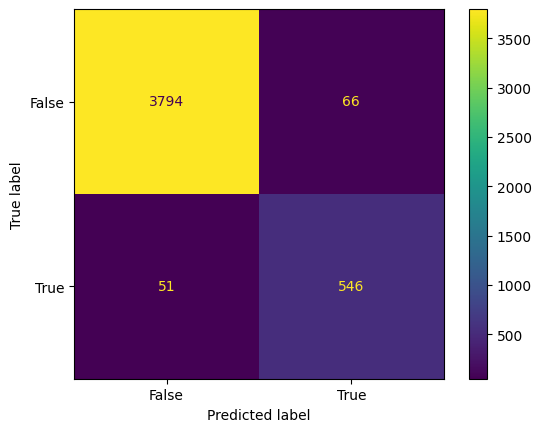

In [29]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 132
True Negative 955
False Positive 10
False Negative 18


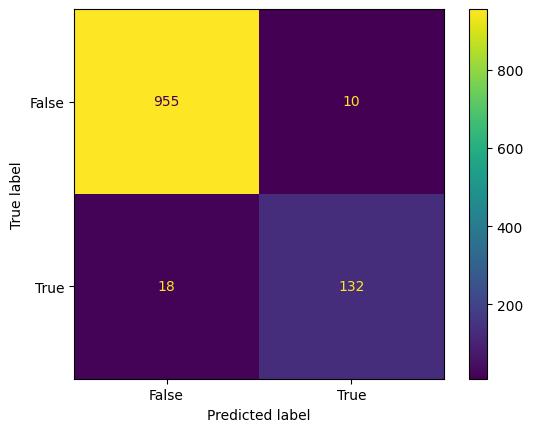

In [30]:
generate_confusion_matrix(X_test, Y_test, model)

<h2>Adjusting Regularisation Strength</h2>

In [31]:
model = LogisticRegression(penalty='l2', solver='liblinear', n_jobs=-1, tol=0.01, C=0.5, fit_intercept=True, class_weight="balanced", max_iter=100, warm_start=False)
model.fit(X_train, Y_train)

D:\Anaconda\envs\spamDetection\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


LogisticRegression(C=0.5, class_weight='balanced', n_jobs=-1,
                   solver='liblinear', tol=0.01)

In [32]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 99.53
Accuracy on test data is: 98.48
F1 score on train data is: 0.98
F1 score on test data is: 0.94


True Positive 592
True Negative 3844
False Positive 16
False Negative 5


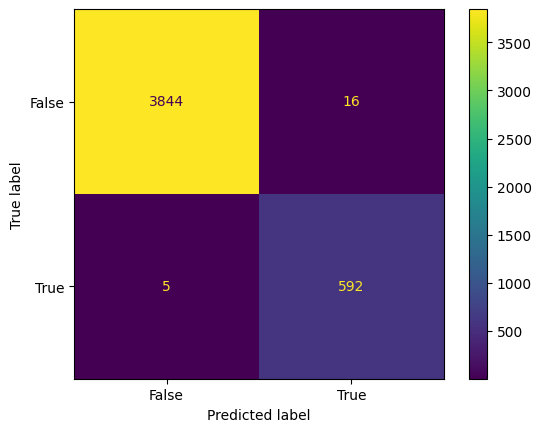

In [33]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 136
True Negative 962
False Positive 3
False Negative 14


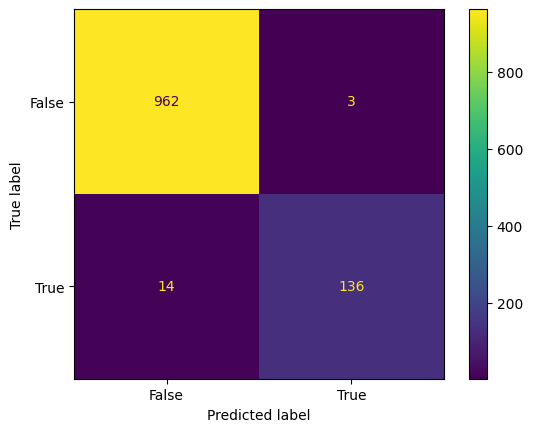

In [34]:
generate_confusion_matrix(X_test, Y_test, model)

<h2>Adjusting Bias</h2>

In [35]:
model = LogisticRegression(penalty='l2', solver='liblinear', n_jobs=-1, tol=0.01, C=0.5, fit_intercept=True, class_weight="balanced", max_iter=100, warm_start=False)
model.fit(X_train, Y_train)

D:\Anaconda\envs\spamDetection\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


LogisticRegression(C=0.5, class_weight='balanced', n_jobs=-1,
                   solver='liblinear', tol=0.01)

In [36]:
model.intercept_

array([-3.10309295])

In [37]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 99.53
Accuracy on test data is: 98.48
F1 score on train data is: 0.98
F1 score on test data is: 0.94


True Positive 592
True Negative 3844
False Positive 16
False Negative 5


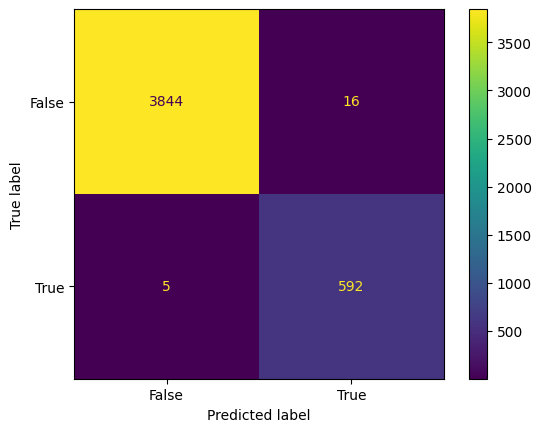

In [38]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 136
True Negative 962
False Positive 3
False Negative 14


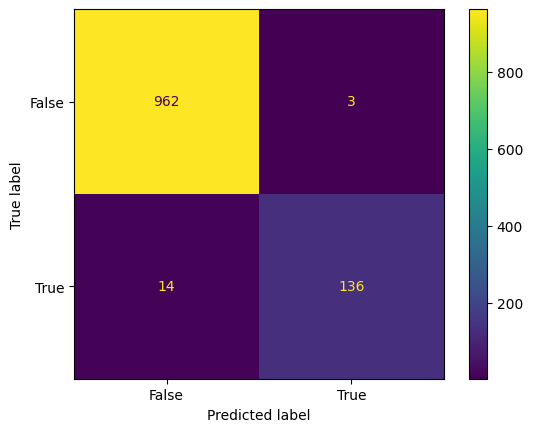

In [39]:
generate_confusion_matrix(X_test, Y_test, model)

<h1>Passive Aggressive Classifier</h1>

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [41]:
model = PassiveAggressiveClassifier(C=1.0, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, warm_start=False, random_state=42, early_stopping=True, validation_fraction=0.1, loss="hinge", n_jobs=-1, class_weight="balanced", average=False)
model.fit(X_train, Y_train)

PassiveAggressiveClassifier(class_weight='balanced', early_stopping=True,
                            n_jobs=-1, random_state=42)

In [42]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 99.78
Accuracy on test data is: 97.58
F1 score on train data is: 0.99
F1 score on test data is: 0.91


True Positive 590
True Negative 3857
False Positive 3
False Negative 7


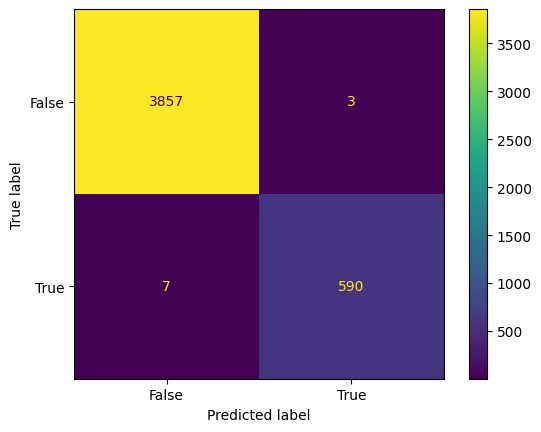

In [43]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 130
True Negative 958
False Positive 7
False Negative 20


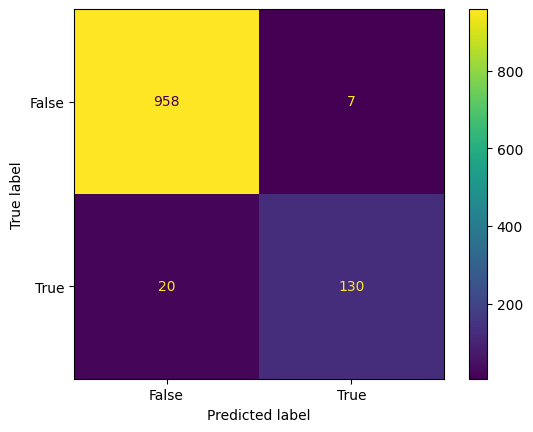

In [44]:
generate_confusion_matrix(X_test, Y_test, model)

<h2>Selecting Loss Function</h2>

In [45]:
model = PassiveAggressiveClassifier(C=0.5, fit_intercept=True, max_iter=1000, tol=0.01, shuffle=True, warm_start=False, random_state=42, early_stopping=True, validation_fraction=0.1, loss="squared_hinge", n_jobs=-1, class_weight="balanced", average=False)
model.fit(X_train, Y_train)

PassiveAggressiveClassifier(C=0.5, class_weight='balanced', early_stopping=True,
                            loss='squared_hinge', n_jobs=-1, random_state=42,
                            tol=0.01)

In [46]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 99.78
Accuracy on test data is: 97.76
F1 score on train data is: 0.99
F1 score on test data is: 0.91


True Positive 590
True Negative 3857
False Positive 3
False Negative 7


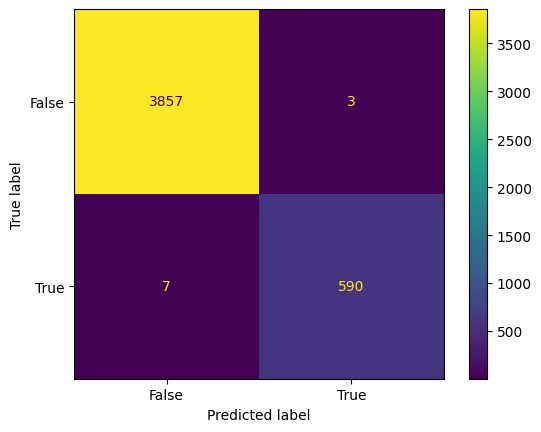

In [47]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 131
True Negative 959
False Positive 6
False Negative 19


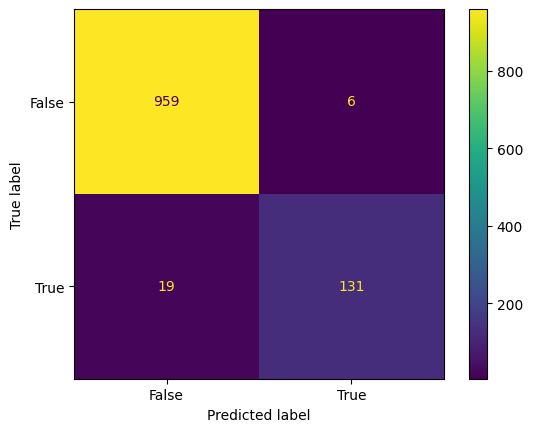

In [48]:
generate_confusion_matrix(X_test, Y_test, model)

<h2>Select Early Stop Critertia</h2>

In [49]:
model = PassiveAggressiveClassifier(C=0.5, fit_intercept=True, max_iter=1000, tol=0.01, shuffle=True, warm_start=False, random_state=42, early_stopping=True, validation_fraction=0.9, loss="squared_hinge", n_jobs=-1, class_weight="balanced", average=False)
model.fit(X_train, Y_train)

PassiveAggressiveClassifier(C=0.5, class_weight='balanced', early_stopping=True,
                            loss='squared_hinge', n_jobs=-1, random_state=42,
                            tol=0.01, validation_fraction=0.9)

In [50]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 97.46
Accuracy on test data is: 97.13
F1 score on train data is: 0.90
F1 score on test data is: 0.89


True Positive 508
True Negative 3836
False Positive 24
False Negative 89


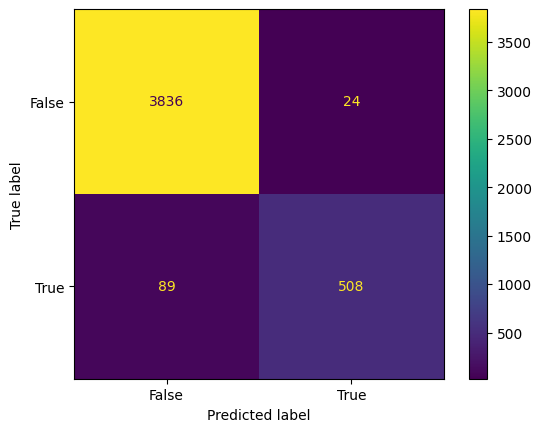

In [51]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 124
True Negative 959
False Positive 6
False Negative 26


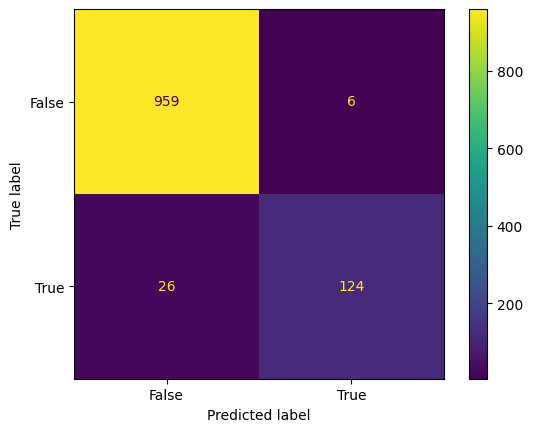

In [52]:
generate_confusion_matrix(X_test, Y_test, model)

<h1>KNN</h1>

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1)

In [55]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 93.65
Accuracy on test data is: 92.11
F1 score on train data is: 0.69
F1 score on test data is: 0.58


True Positive 314
True Negative 3860
False Positive 0
False Negative 283


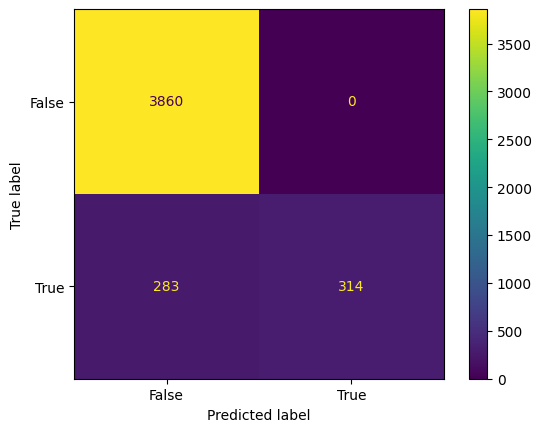

In [56]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 62
True Negative 965
False Positive 0
False Negative 88


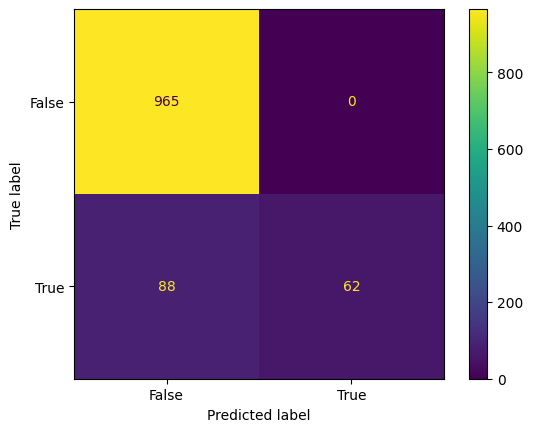

In [57]:
generate_confusion_matrix(X_test, Y_test, model)

<h2>Select Number of Neighbours to consider</h2>

In [58]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1)

In [59]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 93.65
Accuracy on test data is: 92.11
F1 score on train data is: 0.69
F1 score on test data is: 0.58


True Positive 314
True Negative 3860
False Positive 0
False Negative 283


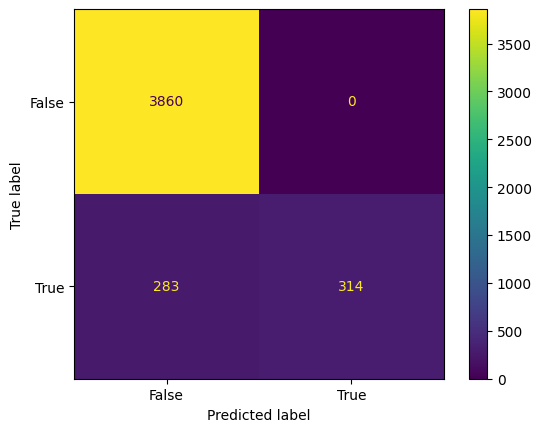

In [60]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 62
True Negative 965
False Positive 0
False Negative 88


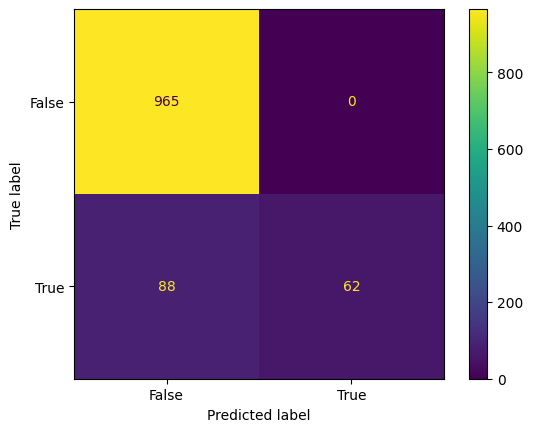

In [61]:
generate_confusion_matrix(X_test, Y_test, model)

<h2>Selecting Weights for neighbours</h2>

In [62]:
model = KNeighborsClassifier(n_neighbors=6, weights="uniform", algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [63]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 92.35
Accuracy on test data is: 91.12
F1 score on train data is: 0.60
F1 score on test data is: 0.51


True Positive 256
True Negative 3860
False Positive 0
False Negative 341


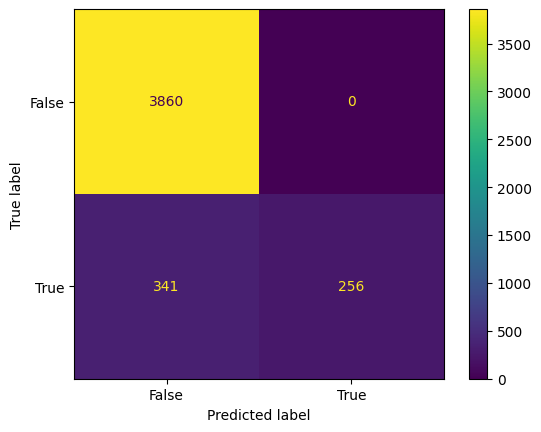

In [64]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 51
True Negative 965
False Positive 0
False Negative 99


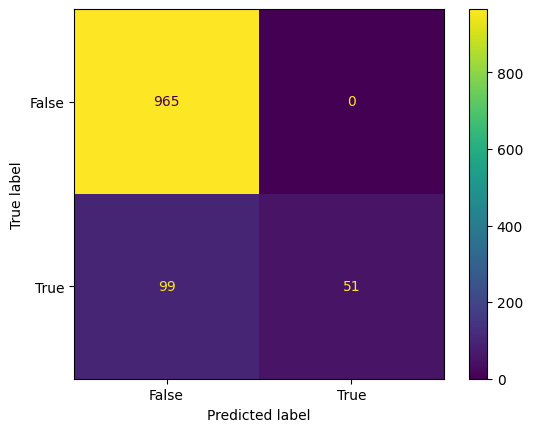

In [65]:
generate_confusion_matrix(X_test, Y_test, model)

<h2>Selecting Algortihm for computing Nearest Neighbours</h2>

In [67]:
model = KNeighborsClassifier(n_neighbors=6, weights="uniform", algorithm='brute', leaf_size=30, p=4, metric='minkowski', metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=6, p=4)

In [63]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 92.35
Accuracy on test data is: 91.12
F1 score on train data is: 0.60
F1 score on test data is: 0.51


True Positive 256
True Negative 3860
False Positive 0
False Negative 341


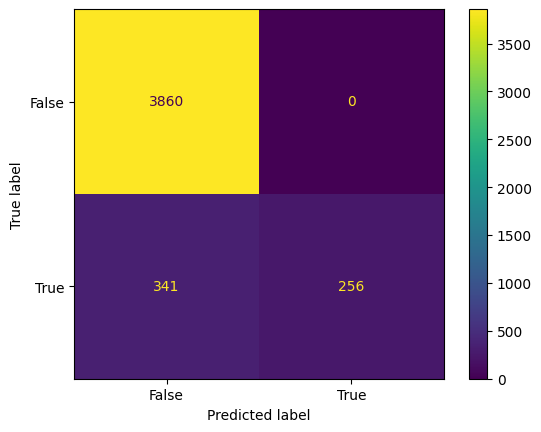

In [64]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 51
True Negative 965
False Positive 0
False Negative 99


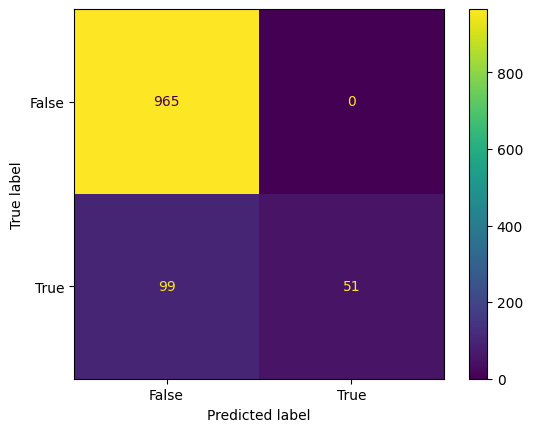

In [65]:
generate_confusion_matrix(X_test, Y_test, model)

<h2>Choosing Distance Metric</h2>

In [67]:
model = KNeighborsClassifier(n_neighbors=6, weights="uniform", algorithm='brute', leaf_size=30, p=4, metric='minkowski', metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=6, p=4)

In [68]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))


KeyboardInterrupt



True Positive 314
True Negative 3860
False Positive 0
False Negative 283


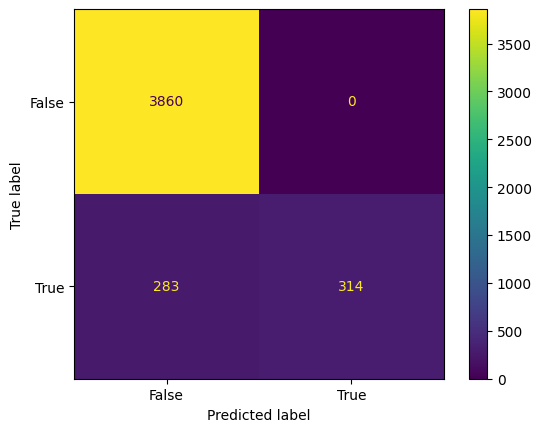

In [60]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 62
True Negative 965
False Positive 0
False Negative 88


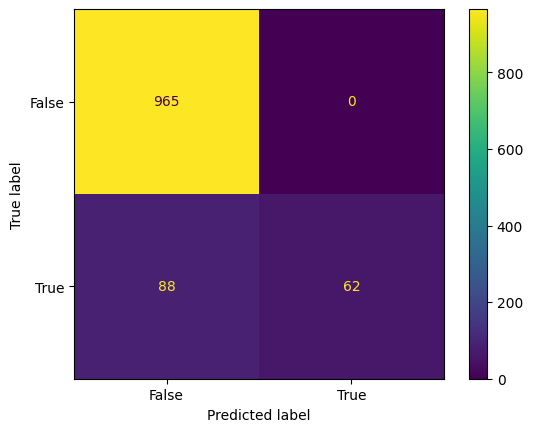

In [61]:
generate_confusion_matrix(X_test, Y_test, model)

<h1>SVM</h1>

In [71]:
from sklearn.svm import SVC

In [73]:
model = SVC()
model.fit(X_train, Y_train)

SVC()

In [74]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 99.64
Accuracy on test data is: 97.76
F1 score on train data is: 0.99
F1 score on test data is: 0.91


True Positive 256
True Negative 3860
False Positive 0
False Negative 341


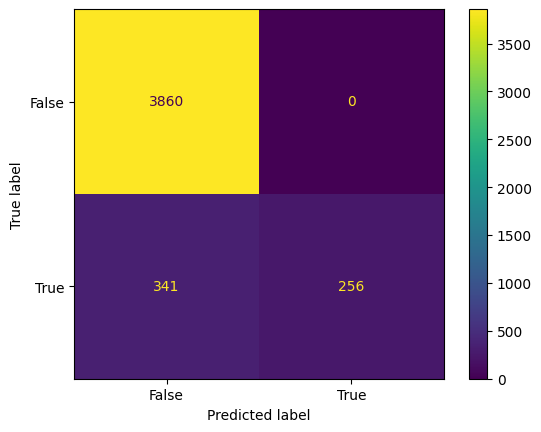

In [64]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 51
True Negative 965
False Positive 0
False Negative 99


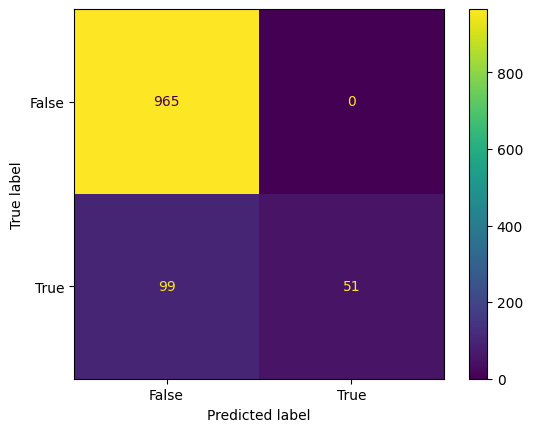

In [65]:
generate_confusion_matrix(X_test, Y_test, model)

<h2>Testing Different Kernals for SVC Model</h2>

<h3> 1. Using Linear Kernal Function</h3>

In [66]:
model_linear = svm.SVC(kernel = 'linear', C = 0.01, random_state = 42)
model_linear.fit(X_train, Y_train)

SVC(C=0.01, kernel='linear', random_state=42)

In [63]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 92.35
Accuracy on test data is: 91.12
F1 score on train data is: 0.60
F1 score on test data is: 0.51


True Positive 256
True Negative 3860
False Positive 0
False Negative 341


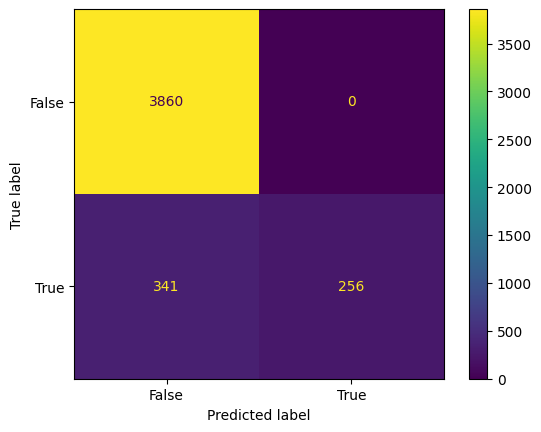

In [64]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 51
True Negative 965
False Positive 0
False Negative 99


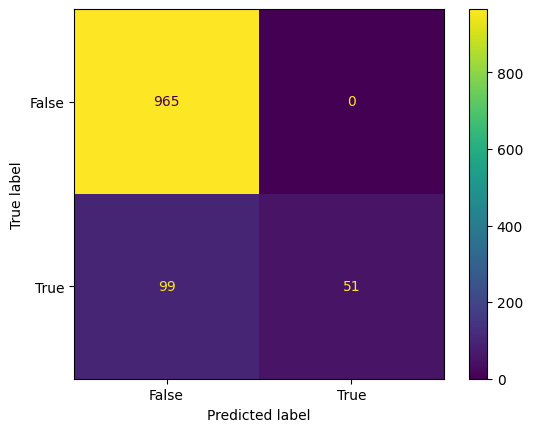

In [65]:
generate_confusion_matrix(X_test, Y_test, model)

<h3>2. Using RBF Kernal Function</h3>

In [95]:
model_linear = svm.SVC(kernel = 'rbf', C = 1, random_state = 42)
model_linear.fit(X_train, Y_train)

SVC(C=1, random_state=42)

In [63]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 92.35
Accuracy on test data is: 91.12
F1 score on train data is: 0.60
F1 score on test data is: 0.51


True Positive 256
True Negative 3860
False Positive 0
False Negative 341


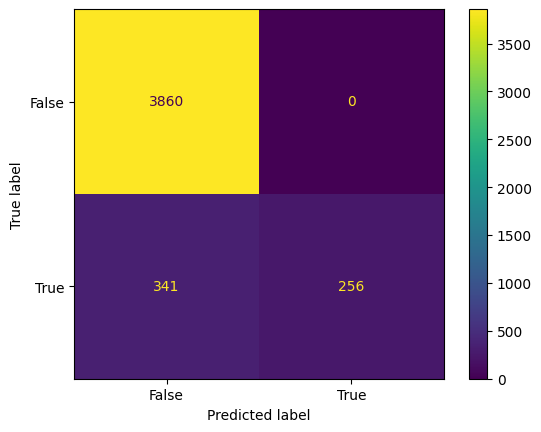

In [64]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 51
True Negative 965
False Positive 0
False Negative 99


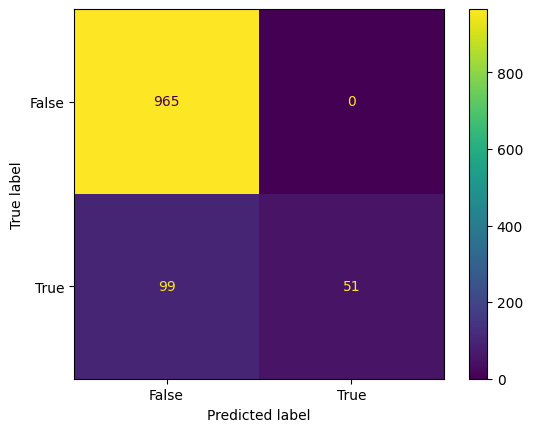

In [65]:
generate_confusion_matrix(X_test, Y_test, model)

<h3>3. Using Polynomial Kernel Function</h3>

In [113]:
model_poly = svm.SVC(kernel = 'poly', C = 0.1, random_state = 42)
model_poly.fit(X_train, Y_train)

SVC(C=0.1, kernel='poly', random_state=42)

In [63]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 92.35
Accuracy on test data is: 91.12
F1 score on train data is: 0.60
F1 score on test data is: 0.51


True Positive 256
True Negative 3860
False Positive 0
False Negative 341


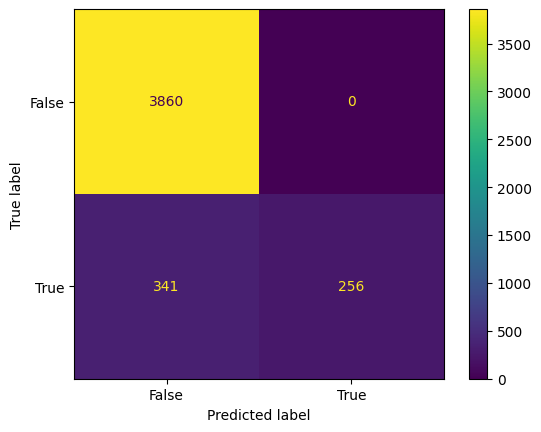

In [64]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 51
True Negative 965
False Positive 0
False Negative 99


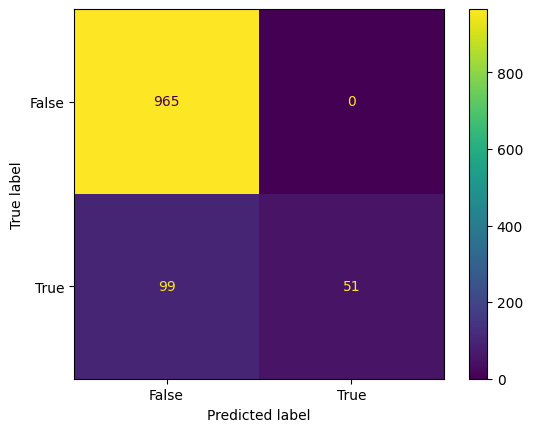

In [65]:
generate_confusion_matrix(X_test, Y_test, model)

<h3>3. Using Sigmoid Kernel Function</h3>

In [123]:
model_sigmoid = svm.SVC(kernel = 'sigmoid', C = 0.125 , random_state = 42)
model_sigmoid.fit(X_train, Y_train)

SVC(C=0.125, kernel='poly', random_state=42)

In [63]:
evaluate_model(model, is_split=True, train_set=(X_train, Y_train), test_set=(X_test, Y_test))

Accuracy on train data is: 92.35
Accuracy on test data is: 91.12
F1 score on train data is: 0.60
F1 score on test data is: 0.51


True Positive 256
True Negative 3860
False Positive 0
False Negative 341


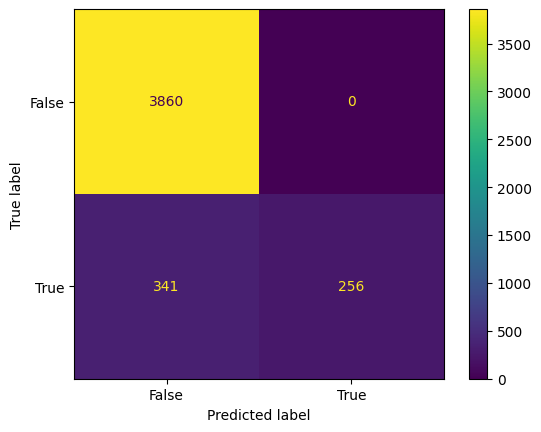

In [64]:
generate_confusion_matrix(X_train, Y_train, model)

True Positive 51
True Negative 965
False Positive 0
False Negative 99


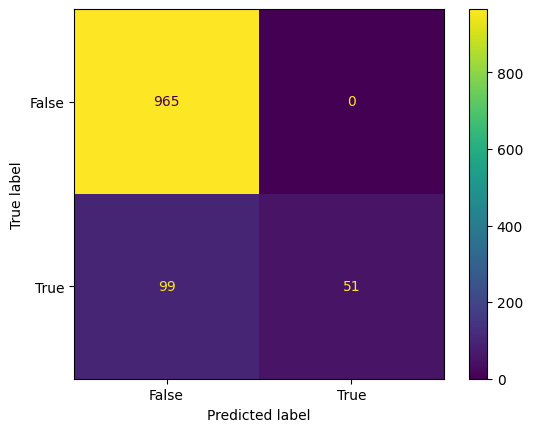

In [65]:
generate_confusion_matrix(X_test, Y_test, model)

<h3>Selecting regularisation strength for Sigmoid Kernel Function</h3>

In [127]:
# List of C values to test
C_values = [0.01, 0.125, 0.5, 0.75, 1.0 ,5,10,20,50, 100,200,500]

# To store results
results = []

# Loop through each C value
for C in C_values:
    # Initialize the SVC model with a polynomial kernel
    model_sigmoid = svm.SVC(kernel='poly', C = C, random_state=42)
    model_sigmoid.fit(X_train, Y_train)
    
    # Evaluate on training data
    prediction_train = model_sigmoid.predict(X_train)
    accuracy_train = accuracy_score(Y_train, prediction_train)
    f1_train = f1_score(Y_train, prediction_train)
    
    # Evaluate on test data
    prediction_test = model_sigmoid.predict(X_test)
    accuracy_test = accuracy_score(Y_test, prediction_test)
    f1_test = f1_score(Y_test, prediction_test)
    
    # Append results
    results.append({
        'C': C,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Train F1 Score': f1_train,
        'Test F1 Score': f1_test
    })

# Convert results to a DataFrame for better visualization
# import pandas as pd
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

          C  Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score
0     0.010        0.868746       0.868161        0.039409       0.039216
1     0.125        0.954678       0.921973        0.796371       0.591549
2     0.500        0.984294       0.947982        0.937722       0.762295
3     0.750        0.987435       0.950673        0.950791       0.777328
4     1.000        0.989904       0.951570        0.960836       0.782258
5     5.000        0.996859       0.952466        0.988136       0.790514
6    10.000        0.998654       0.952466        0.994949       0.790514
7    20.000        0.999551       0.953363        0.998322       0.793651
8    50.000        0.999776       0.954260        0.999162       0.798419
9   100.000        0.999776       0.954260        0.999162       0.798419
10  200.000        1.000000       0.954260        1.000000       0.798419
11  500.000        1.000000       0.954260        1.000000       0.798419


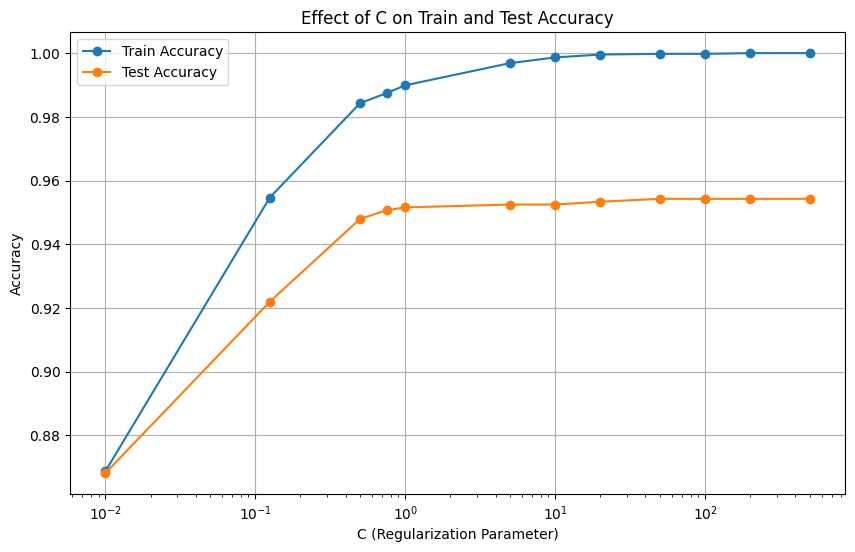

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['C'], results_df['Train Accuracy'], label='Train Accuracy', marker='o')
plt.plot(results_df['C'], results_df['Test Accuracy'], label='Test Accuracy', marker='o')
plt.xscale('log')  # Use a logarithmic scale for C values
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Effect of C on Train and Test Accuracy')
plt.legend()
plt.grid()
plt.show()

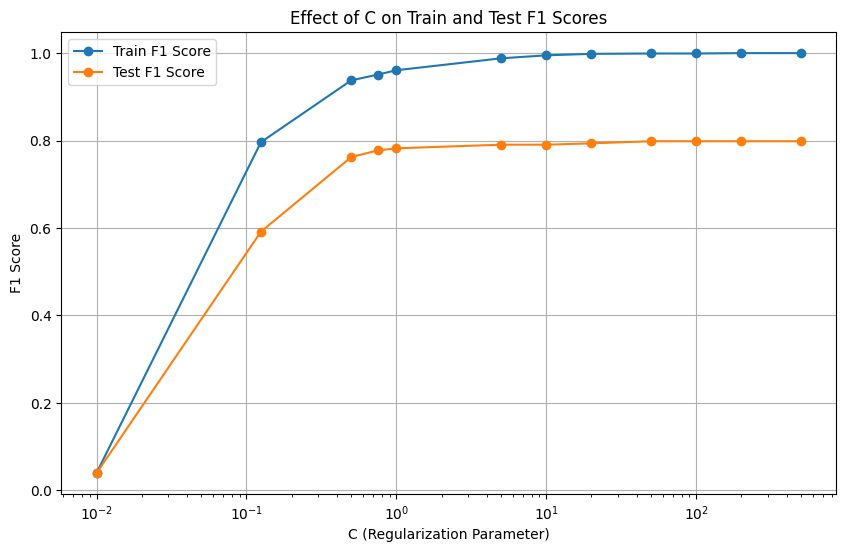

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['C'], results_df['Train F1 Score'], label='Train F1 Score', marker='o')
plt.plot(results_df['C'], results_df['Test F1 Score'], label='Test F1 Score', marker='o')
plt.xscale('log')  # Use a logarithmic scale for C values
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('F1 Score')
plt.title('Effect of C on Train and Test F1 Scores')
plt.legend()
plt.grid()
plt.show()